# Fire fighting Problem (FFP)

# 1. Creating a tree graph called g

In [1]:
import igraph as igraph
from igraph import * 
g = Graph()

import igraph as ig
g = ig.Graph(edges=[[1, 0], [0, 2], [0, 8], [0, 9], [0, 10], [2, 3], [3,4], [4, 5], [5, 6], [7, 6]])   

## Call the graph g

In [2]:
print (g) # number 10 is the number of vertices and number 9 is the number of edges
          # 0--1 shows vertex 0 is adjacent to vertex 1

IGRAPH U--- 11 10 --
+ edges:
0--1 0--2 0--8 0--9 0--10 2--3 3--4 4--5 5--6 6--7


## Visualization of the graph g

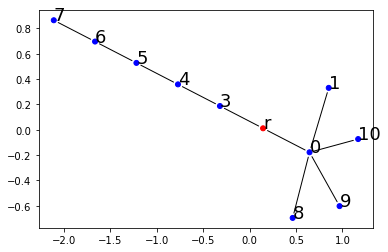

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
igraph.plot(g, target=ax, vertex_label_size=18, vertex_label_dist=20,
            vertex_color=['blue', 'blue', 'red', 'blue', 'blue', 'blue','blue', 'blue','blue','blue','blue'], 
            vertex_label=['0','1','r','3','4','5','6','7','8','9','10'])
# r colored red is where fire starts

# 2. Creating a tree graph called g1

In [4]:
import igraph as igraph
from igraph import * 
g1 = Graph()

import igraph as ig
g1 = ig.Graph(edges=[[0, 1], [0, 2],[0, 3],[0, 4],[0, 5],[0, 6],[1, 2],[2, 3],[3, 4],[4, 5],[5, 6],[1, 12],[12, 13],[2, 12], [3, 12], [4, 12],
                    [5,12], [12,6],[6, 14], [7, 14], [8, 14],[9, 14],[10, 14],[11, 14]] )

## Call the graph g1

In [5]:
print (g1) # number 15 is the number of vertices and number 23 is the number of edges
          # 0--1 shows vertex 0 is adjacent to vertex 1, root = 0

IGRAPH U--- 15 24 --
+ edges:
 0 --  1  2  3  4  5  6       6 --  0  5 12 14            12 --  1  2  3  4  5
6 13
 1 --  0  2 12                7 -- 14                     13 -- 12
 2 --  0  1  3 12             8 -- 14                     14 --  6  7  8  9 10
11
 3 --  0  2  4 12             9 -- 14
 4 --  0  3  5 12            10 -- 14
 5 --  0  4  6 12            11 -- 14


## Visualization of the graph g1

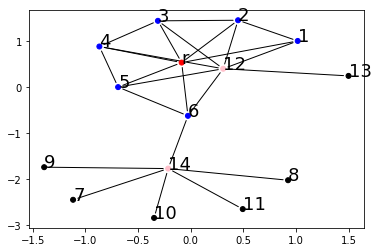

In [6]:
#### import matplotlib.pyplot as plt 
fig, ax = plt.subplots() 
g1.vs
igraph.plot(g1, bbox=(400, 400), target=ax, vertex_label_size=18, vertex_label_dist=20, edge_arrow_size=30,
vertex_color=['red', 'blue', 'blue', 'blue', 'blue', 'blue','blue','none', 'none','none','none',
              'none','pink','none','pink'], 
            vertex_label=['r','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
# r colored red is where fire starts

# 3. Creating a tree graph called g2

In [7]:
import igraph as igraph
from igraph import * 
g2 = Graph()

import igraph as ig
g2 = ig.Graph(edges=[[1, 0], [0, 3], [4, 0], [1, 2], [1, 5], [3,7], [2, 3], [2, 6], [7, 4], [4, 5], [6, 5], [6,7]])

## Call the graph g2

In [8]:
print (g2)

IGRAPH U--- 8 12 --
+ edges:
0 -- 1 3 4   2 -- 1 3 6   4 -- 0 5 7   6 -- 2 5 7
1 -- 0 2 5   3 -- 0 2 7   5 -- 1 4 6   7 -- 3 4 6


## Visualization of the graph g2

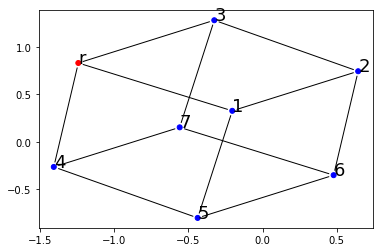

In [9]:
 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
igraph.plot(g2, target=ax, vertex_color=['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r','1','2','3','4','5','6','7'])

# Define fire function spread in a graph 

In [10]:
def find_neighbors(g, root, num_vert):
    
    totalBurnt = set([root])
    newly_burnt_vertices = set()
    r=set([root])
    
    i=0
    while(len(r) != 0): # as long as root set is not empty, print and update newly burnt vertices
         
        print(f"round={i}, burning vertices = {r}")
        newly_burnt_vertices.clear()
        
        for j in r:
            n= g.neighbors(j)
            n = set(n).difference(totalBurnt)
            newly_burnt_vertices.update(n)
            totalBurnt.update(newly_burnt_vertices)
        
        r = newly_burnt_vertices.copy()
        i+=1

## Call the fire function spead on the graphs g, g1, and g2

In [11]:
find_neighbors(g,2,11)   # call the function for root = 2  with 10 vertices
                        

round=0, burning vertices = {2}
round=1, burning vertices = {0, 3}
round=2, burning vertices = {1, 4, 8, 9, 10}
round=3, burning vertices = {5}
round=4, burning vertices = {6}
round=5, burning vertices = {7}


In [12]:
find_neighbors(g1,0,14) # call the function for root = 0   with 14 vertices

round=0, burning vertices = {0}
round=1, burning vertices = {1, 2, 3, 4, 5, 6}
round=2, burning vertices = {12, 14}
round=3, burning vertices = {7, 8, 9, 10, 11, 13}


In [13]:
find_neighbors(g2,0,8) # call the function for root = 0   with 8 vertices

round=0, burning vertices = {0}
round=1, burning vertices = {1, 3, 4}
round=2, burning vertices = {2, 5, 7}
round=3, burning vertices = {6}


# Define FF strategy function using "The greedy algorithm"

In [14]:
import igraph as ig
g1 = ig.Graph(edges=[[0, 1], [6, 12], [0, 2],[0, 3],[0, 4],[0, 5],[0, 6],[1, 2],[2, 3],[3, 4],[4, 5],[5, 6],[1, 12],[12, 13],[2, 12], [3, 12], [4, 12],
                    [5,12], [6, 14], [7, 14], [8, 14],[9, 14],[10, 14],[11, 14]] )

import random
def the_greedy(g, burnt_candidates): 
    v_maxDegree = set() # define a set collecting vertices with the same max degree
    maxDegree = 0                     
  

    for v in burnt_candidates: 
        if (g.vs[v].degree()) > maxDegree:
            maxDegree = g.vs[v].degree() 
            v_maxDegree.clear()
            v_maxDegree.add(v)
       

    return set([random.choice(list(v_maxDegree))])


# define a function to find neighbors, statuse of vertices, and update them        

def fire(g, root):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)
            
        if(i==0): print(f"round={i}, r= {root}") 
            
        if (len(burning_candidates) == 0 ):
            print("Total burnt vertices= ", totalBurnt)
            break
            
        # call the function the_greedy       
        v_protected=the_greedy(g, burning_candidates)
        protected.update(v_protected)
        
        root = burning_candidates.difference(protected)
        totalBurnt.update(root)
        
        if(i==0): 
            
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
        else:
             
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
            
            print("Total burnt vertices= ", totalBurnt)
        burning_candidates.clear()
        
        i += 1
    print("") 
    print("Protected vertices with firefighters = ", protected)

    


## Call fire function using The greedy algorithm on the graph g, g1, and g2

In [15]:
fire(g,2) # root is 2 in tree g

round=0, r= {2}
round=0, Burning candidate vertices= {0, 3}, Protected Vertex = {0}
round=1, Burning candidate vertices= {4}, Protected Vertex = {4}
Total burnt vertices=  {2, 3}

Protected vertices with firefighters =  {0, 4}


In [16]:
fire(g1,0)  # root is 0 in more complecated graph g1

round=0, r= {0}
round=0, Burning candidate vertices= {1, 2, 3, 4, 5, 6}, Protected Vertex = {2}
round=1, Burning candidate vertices= {12, 14}, Protected Vertex = {12}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 14}
round=2, Burning candidate vertices= {7, 8, 9, 10, 11}, Protected Vertex = {7}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 14}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 14}

Protected vertices with firefighters =  {2, 12, 7}


In [17]:
fire(g2,0)  # root is 0 in cubic graph g2

round=0, r= {0}
round=0, Burning candidate vertices= {1, 3, 4}, Protected Vertex = {1}
round=1, Burning candidate vertices= {2, 5, 7}, Protected Vertex = {2}
Total burnt vertices=  {0, 3, 4, 5, 7}
round=2, Burning candidate vertices= {6}, Protected Vertex = {6}
Total burnt vertices=  {0, 3, 4, 5, 7}

Protected vertices with firefighters =  {1, 2, 6}


# Define FF strategy function using "The greedy optimized algorithm"

In [18]:
import random

def the_greedy_optimized(g, totalBurnt, burnt_candidates): 
    
    v_maxDegree = set() # define a set collecting vertices with the same max degree
    
    maxDegree = 0                     
  
    for v in burnt_candidates: # find a max vertex degree from burnt candidate
        neighbor = set(g.neighbors(v))# find neighbours of v in burnt candidates, put them in a set called neighbor
        desiredDegree = len(neighbor.difference(totalBurnt).difference(burnt_candidates))
        if (desiredDegree > maxDegree):
            maxDegree = desiredDegree
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (desiredDegree == maxDegree):
            v_maxDegree.add(v)
            
    if (len(v_maxDegree) == 1): 
        return v_maxDegree

    return set([random.choice(list(v_maxDegree))])



# define a function to find neighbors, statuse of vertices, and update them        
# store burnt vertices in total burnt set(total number =i), store burnt candidate in a set , store root in a set
# store protected vertices in a set , find neighbors of given V --> call it burnt_candidates  

def fire(g, root):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

        if (len(burning_candidates) == 0 ):
            break
        v_protected=the_greedy_optimized(g, totalBurnt, burning_candidates) # call the function the_greedy_optimized        
        protected.update(v_protected)
        
        # root = neighbors.difference(protected)
        root = burning_candidates.difference(protected)
        totalBurnt.update(root)
        
        if(i==0): 
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
        else:
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
            
        burning_candidates.clear()
        
        i += 1
    print("")    
    print("Protected vertices with firefighters = ", protected)
    print("Total burnt= ", totalBurnt)



## Call fire function using The greedy optimized algorithm on the graph g, g1, and g2

In [19]:
fire(g,2) # root is 2 in tree g

round=0, Burning candidate vertices= {0, 3}, Protected Vertex = {0}
round=1, Burning candidate vertices= {4}, Protected Vertex = {4}

Protected vertices with firefighters =  {0, 4}
Total burnt=  {2, 3}


In [20]:
fire(g1,0)  # root is 0 in more complecated graph g1

round=0, Burning candidate vertices= {1, 2, 3, 4, 5, 6}, Protected Vertex = {6}
round=1, Burning candidate vertices= {12}, Protected Vertex = {12}

Protected vertices with firefighters =  {12, 6}
Total burnt=  {0, 1, 2, 3, 4, 5}


In [21]:
fire(g2,0)  # root is 0 in cubic graph g2

round=0, Burning candidate vertices= {1, 3, 4}, Protected Vertex = {1}
round=1, Burning candidate vertices= {2, 5, 7}, Protected Vertex = {2}
round=2, Burning candidate vertices= {6}, Protected Vertex = {6}

Protected vertices with firefighters =  {1, 2, 6}
Total burnt=  {0, 3, 4, 5, 7}


# Random root examination


## Define a function to pick a root randomly from The greedy optimized algorithm

In [22]:
import random
def calling_fire_random(g):
    
    v = random.choice([v.index for v in g.vs])
    fire(g,v)

### Calling the function to choose a roots randomly

In [23]:
calling_fire_random(g)

round=0, Burning candidate vertices= {4, 6}, Protected Vertex = {6}
round=1, Burning candidate vertices= {3}, Protected Vertex = {3}

Protected vertices with firefighters =  {3, 6}
Total burnt=  {4, 5}


In [24]:
calling_fire_random(g1)

round=0, Burning candidate vertices= {0, 12, 5, 14}, Protected Vertex = {12}
round=1, Burning candidate vertices= {1, 2, 3, 4, 7, 8, 9, 10, 11}, Protected Vertex = {2}

Protected vertices with firefighters =  {2, 12}
Total burnt=  {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}


In [25]:
calling_fire_random(g2)

round=0, Burning candidate vertices= {3, 4, 6}, Protected Vertex = {4}
round=1, Burning candidate vertices= {0, 2, 5}, Protected Vertex = {0}
round=2, Burning candidate vertices= {1}, Protected Vertex = {1}

Protected vertices with firefighters =  {0, 1, 4}
Total burnt=  {2, 3, 5, 6, 7}


# Comparison between The greedy and The greedy optimized

In [34]:
import random
def the_greedy(g, burnt_candidates, totalBurnt): 
    v_maxDegree = set() # define a set collecting vertices with the same max degree
    maxDegree = 0                     
  

    for v in burnt_candidates: 
        if (g.vs[v].degree()) > maxDegree:
            maxDegree = g.vs[v].degree() 
            v_maxDegree.clear()
            v_maxDegree.add(v)
       

    return set([random.choice(list(v_maxDegree))])


def fire(g, root):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

        if(i==0): 
            print(f"round={i}, r= {root}") 

        if (len(burning_candidates) ==0 ):
            print("Total burnt= ", totalBurnt)
            break

        # call both algorithms 
        v_protected=the_greedy(g, burning_candidates)       
        protected.update(v_protected)

        root = burning_candidates.difference(protected)
        totalBurnt.update(root)


        if(i==0): 
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
            
        else:
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
            #print("Total burnt vertices= ", totalBurnt)
        burning_candidates.clear()
        
        i += 1
         
    print("Protected vertices with firefighters = ", protected)
#################
import random
def the_greedy_optimized(g, burnt_candidates, totalBurnt): 

    v_maxDegree = set() # define a set collecting vertices with the same max degree
    
    maxDegree = 0                     
  
    for v in burnt_candidates: # find a max vertex degree from burnt candidate
        neighbor = set(g.neighbors(v))# find neighbours of v in burnt candidates, put them in a set called neighbor
        desiredDegree = len(neighbor.difference(totalBurnt).difference(burnt_candidates))
        if (desiredDegree > maxDegree):
            maxDegree = desiredDegree
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (desiredDegree == maxDegree):
            v_maxDegree.add(v)
            
    if (len(v_maxDegree) == 1): 
        return v_maxDegree

    return set([random.choice(list(v_maxDegree))])
#################

def fire(g, root, greedy):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

        if(i==0): 
            print(f"round={i}, r= {root}") 

        if (len(burning_candidates) ==0 ):
            break

    
        v_protected=greedy(g, burning_candidates, totalBurnt)        
        protected.update(v_protected)

        root = burning_candidates.difference(protected)
        totalBurnt.update(root)

     
        if(i==0): 
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
            
        else:
            print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
            print("Total burnt vertices= ", totalBurnt)
        burning_candidates.clear()
        
        i += 1
         
    print("Protected vertices with firefighters = ", protected)
    #print("Total burnt vertices optimized= ", totalBurnt)

    ratio= round((len(totalBurnt)/len(g.vs))*100, 1)
    return totalBurnt, protected, ratio



fire(g1,0, the_greedy_optimized)

print("")

fire(g1,0, the_greedy)

round=0, r= {0}
round=0, Burning candidate vertices= {1, 2, 3, 4, 5, 6}, Protected Vertex = {6}
round=1, Burning candidate vertices= {12}, Protected Vertex = {12}
Total burnt vertices=  {0, 1, 2, 3, 4, 5}
Protected vertices with firefighters =  {12, 6}

round=0, r= {0}
round=0, Burning candidate vertices= {1, 2, 3, 4, 5, 6}, Protected Vertex = {2}
round=1, Burning candidate vertices= {12, 14}, Protected Vertex = {12}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 14}
round=2, Burning candidate vertices= {7, 8, 9, 10, 11}, Protected Vertex = {7}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 14}
Protected vertices with firefighters =  {2, 12, 7}


({0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 14}, {2, 7, 12}, 73.3)

## Damage result

In [35]:
damages_result = []
vertecies = range(len(g1.vs))

listMaxDamagedVertecies = []
maxDamage = 0

for v in vertecies:
    totalBurnt, protected, ratio = fire(g1, v, the_greedy) 
    damages_result.append([totalBurnt, protected, ratio])
    
    if (ratio > maxDamage):
        maxDamage = ratio
        listMaxDamagedVertecies.clear()
        listMaxDamagedVertecies.append(v)
        
    elif (ratio == maxDamage):
        listMaxDamagedVertecies.append(v)
        
print(f"The highest damage is {maxDamage}% on vertices ", listMaxDamagedVertecies)  
    
print("")    

for i,d in enumerate(damages_result):
    
    print(f"vertex {i}= Total Burnt: {d[0]}, Protected: {d[1]}, Ratio damage: {d[2]}%")

round=0, r= {0}
round=0, Burning candidate vertices= {1, 2, 3, 4, 5, 6}, Protected Vertex = {2}
round=1, Burning candidate vertices= {12, 14}, Protected Vertex = {12}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 14}
round=2, Burning candidate vertices= {7, 8, 9, 10, 11}, Protected Vertex = {7}
Total burnt vertices=  {0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 14}
Protected vertices with firefighters =  {2, 12, 7}
round=0, r= {1}
round=0, Burning candidate vertices= {0, 2, 12}, Protected Vertex = {12}
round=1, Burning candidate vertices= {3, 4, 5, 6}, Protected Vertex = {3}
Total burnt vertices=  {0, 1, 2, 4, 5, 6}
round=2, Burning candidate vertices= {14}, Protected Vertex = {14}
Total burnt vertices=  {0, 1, 2, 4, 5, 6}
Protected vertices with firefighters =  {3, 12, 14}
round=0, r= {2}
round=0, Burning candidate vertices= {0, 1, 3, 12}, Protected Vertex = {12}
round=1, Burning candidate vertices= {4, 5, 6}, Protected Vertex = {4}
Total burnt vertices=  {0, 1, 2, 3, 5, 6}
round=2, Burning candidate